In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("data/finnhub1h.csv")
columns_to_read = ["symbol","trade_ts","price","trade_conditions","type","volume"]
timestamp_format = "%Y-%m-%d %H:%M:%S.%f%z"
df = df[columns_to_read]
df = df.head(10000)
# df["trade_ts"] = df["trade_ts"].apply(lambda a: datetime.strptime(a, timestamp_format))
# df = df.set_index("trade_ts")

In [3]:
import numpy as np
import pandas as pd

def add_anomalies(input_df, anomaly_ratio=0.02):
    """
    Introduce random anomalies in specified columns of the DataFrame, with anomalies being
    based on the mean of two closest values (previous and next).
    
    Parameters:
    input_df (pd.DataFrame): Input DataFrame
    anomaly_ratio (float): Proportion of rows to have anomalies (0 < anomaly_ratio <= 1)
    
    Returns:
    pd.DataFrame: DataFrame with anomalies
    """
    df_anomalous = input_df.copy()
    num_rows = len(input_df)
    num_anomalies = max(1, int(anomaly_ratio * num_rows))  # Ensure at least one anomaly
    
    # Initialize columns to mark anomalies
    df_anomalous["price_anomaly"] = 0.0
    df_anomalous["volume_anomaly"] = 0.0
    
    # Price anomalies
    for _ in range(num_anomalies):
        # Select random index for anomaly
        anomaly_index = np.random.choice(input_df.index)
        
        # Ensure not at the first or last index to have both previous and next values
        if anomaly_index == 0:
            anomaly_index += 1
        elif anomaly_index == num_rows - 1:
            anomaly_index -= 1
        
        # Get the previous and next values for "price"
        prev_price = input_df.iloc[anomaly_index - 1]["price"]
        next_price = input_df.iloc[anomaly_index + 1]["price"]
        
        # Calculate the mean of the previous and next price values
        price_mean = (prev_price + next_price) / 2
        
        # Introduce anomaly: randomly add or subtract a small percentage of the mean
        random_factor = np.random.uniform(0, 0.00001) * 4.5
        price_anomaly = round(price_mean + np.random.choice([-1, 1]) * random_factor * price_mean, 2)
        
        # Set anomaly and update price column
        
        df_anomalous.loc[anomaly_index, "price"] = price_anomaly
        
        df_anomalous.loc[anomaly_index, "price_anomaly"] = 1.0  # Mark anomaly
    
    
    # Volume anomalies
    for _ in range(num_anomalies):
        # Select random index for anomaly
        anomaly_index = np.random.choice(input_df.index)
        
        # Ensure not at the first or last index to have both previous and next values
        if anomaly_index == 0:
            anomaly_index += 1
        elif anomaly_index == num_rows - 1:
            anomaly_index -= 1
        
        # Get the previous and next values for "volume"
        prev_volume = input_df.iloc[anomaly_index - 1]["volume"]
        next_volume = input_df.iloc[anomaly_index + 1]["volume"]
        
        # Calculate the mean of the previous and next volume values
        volume_mean = (prev_volume + next_volume) / 2
        random_factor = np.random.uniform(0, 0.1) * 3
        
        # Introduce anomaly: randomly add or subtract a percentage of the mean
        volume_anomaly = round(volume_mean + np.random.choice([-1, 1]) * random_factor * volume_mean, 5)
        
        # Check if volume anomaly is greater than 0.2
        if volume_anomaly > 0.2:
            # Set anomaly and update volume column
            df_anomalous.loc[anomaly_index, "volume"] = volume_anomaly
            df_anomalous.loc[anomaly_index, "volume_anomaly"] = 1.0  # Mark anomaly
            
    df_anomalous["volume_anomaly"] = (df_anomalous["volume"] > 0.2).astype(float)

    return df_anomalous


In [4]:
# Adding anomalies

df_with_anomalies = add_anomalies(df, anomaly_ratio=0.05)

# Display original and anomalous DataFrames
print("Original DataFrame:")
print(df.describe())
print("\nDataFrame with Anomalies:")
print(df_with_anomalies.describe())
df_with_anomalies.to_csv('data/finnhub_anomalies1.csv', index=False)

Original DataFrame:
               price  trade_conditions        volume
count   10000.000000               0.0  10000.000000
mean   101700.783883               NaN      0.022199
std        70.139008               NaN      0.073345
min    101533.020000               NaN      0.000010
25%    101656.000000               NaN      0.000250
50%    101695.200000               NaN      0.001600
75%    101762.960000               NaN      0.010222
max    101839.990000               NaN      2.509020

DataFrame with Anomalies:
               price  trade_conditions        volume  price_anomaly  \
count   10000.000000               0.0  10000.000000   10000.000000   
mean   101700.783906               NaN      0.022403       0.048200   
std        70.138287               NaN      0.073815       0.214199   
min    101533.020000               NaN      0.000010       0.000000   
25%    101656.000000               NaN      0.000250       0.000000   
50%    101695.200000               NaN      0.0016

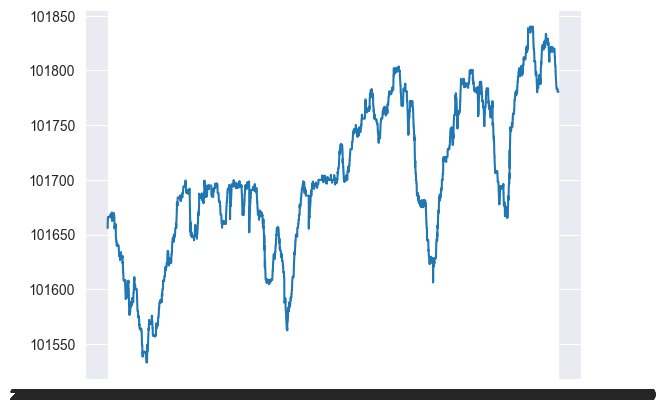

In [5]:

plt.plot(df_with_anomalies["trade_ts"], df_with_anomalies['price'])

In [ ]:
plt.plot(df_with_anomalies["trade_ts"], df_with_anomalies['volume'])